# Program Info

- This program was written by: Luigi Spreafico

- This program aims to show the analitical solution the one-dimensional quantum mechanical problem of the infinite potential well and compare to a numerical solution.


# The modules

In [1]:

import numpy as np

import matplotlib.pyplot as plt

from numpy import linalg as LA


In [2]:
# ----- ===== ----- ===== ----- ===== ----- ===== ----- ===== -----

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Times New Roman",
    'font.size': 12})

writing_font = {'fontname':'Times New Roman'}

# ----- ===== ----- ===== ----- ===== ----- ===== ----- ===== -----

In [3]:

a = 1.0


# The Problem - Quantum Mechanics - infinite potential well


\begin{equation*}
V \left( x \right)
=
\left\{
\begin{split}
&
0
;\;\;\;\;\;
x
\in
\left[ 0 , a \right]
\\&
+ \infty
;\;\;\;\;\;
x
\in
\left( - \infty , 0 \right)
\cup
\left( a , + \infty \right)
\end{split}
\right.
\end{equation*}

<!-- \begin{equation*}
V \left( x \right)
=
\left\{
\begin{split}
&
0
\;\;\;
\left( 0 \leqslant x \leqslant a \right)
\\&
\infty
\;\;\;
\left( x < 0 \vee x > a \right)
\end{split}
\right.
\end{equation*} -->

<h1 style='text-align: center;'> <img src="the_infinite_well.png" width="400"> </h1>

Therefore:

- For $ x \in \left( - \infty , 0 \right) \cup \left( a , \infty \right) $: $\psi \left( x \right) = 0$; from which we have the boundary conditions:

\begin{equation*}
\left\{
\begin{split}
&
\psi \left( 0 \right) = 0
\\&
\psi \left( a \right) = 0
\end{split}
\right.
\end{equation*}

- For $ x \in \left[ 0 , a \right] $:

\begin{equation*}
-
\frac{\hbar^2}{2 m}
\frac{d^2 \psi}{d x^2}
=
E
\psi
\end{equation*}

\begin{equation*}
k
\equiv
\frac{\sqrt{2 m E}}{\hbar}
\end{equation*}

\begin{equation*}
\frac{d^2 \psi}{d x^2}
=
-
k
\psi
\end{equation*}



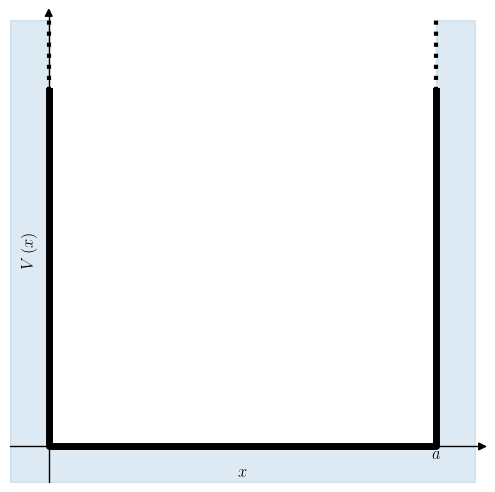

In [4]:

# Ilustration of the well

from mpl_toolkits.axisartist.axislines import AxesZero

fig = plt.figure()
ax = fig.add_subplot(axes_class=AxesZero)

for direction in ["xzero", "yzero"]:
    # adds arrows at the ends of each axis
    ax.axis[direction].set_axisline_style("-|>")

    # adds X and Y-axis from the origin
    ax.axis[direction].set_visible(True)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.axis[direction].set_visible(False)

my_xticks = [r'', r'$a$']
# my_xticks = [r'$0$', r'$a$']
my_xticks_values = [0.0,a]
ax.set_xticks(my_xticks_values)
ax.set_xticklabels(my_xticks)

ax.set_yticks([])

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$V \left( x \right)$', ha='left', va = 'top')

# ax.yaxis.set_label_coords(-0.1,1.1)

the_max_y = 1.2
the_min_y = -0.1

ax.set_ylim(the_min_y,the_max_y)
ax.set_xlim(-0.1,1.1*a)

ax.plot([0.0,0.0,a,a], [1.0,0.0,0.0,1.0], '-k', linewidth=5)
ax.plot([0.0,0.0], [1.0,the_max_y], ':k', linewidth=3)
ax.plot([a,a], [1.0,the_max_y], ':k', linewidth=3)

y1 = np.array([the_max_y,the_max_y,0.0,0.0,the_max_y,the_max_y])
y2 = np.array([the_min_y,the_min_y,the_min_y,the_min_y,the_min_y,the_min_y])
ax.fill_between([-0.1,0.0,0.0,1.0*a,1.0*a,1.1*a], y1, y2, where=(y1 > y2), color='C0', alpha=0.15)

set_size_inches_x = 6.0
set_size_inches_y = 6.0
fig.set_size_inches(set_size_inches_x, set_size_inches_y)

file_name = 'the_infinite_well.pdf'
fig.savefig(file_name,bbox_inches='tight', dpi = 500)

file_name = 'the_infinite_well.png'
fig.savefig(file_name,bbox_inches='tight', dpi = 500)

plt.show()


# Analitical Solution





\begin{equation*}
\psi \left( x \right)
=
A
\sin{\left( k x \right)}
+
B
\cos{\left( k x \right)}
\end{equation*}

Using the boundary conditions:

- $\psi \left( 0 \right) = 0$:

\begin{equation*}
\psi \left( 0 \right)
=
A
\sin{\left( 0 \right)}
+
B
\cos{\left( 0 \right)}
=
B
=
0
\end{equation*}

\begin{equation*}
\therefore
\psi \left( x \right)
=
A
\sin{\left( k x \right)}
\end{equation*}

- $\psi \left( a \right) = 0$:

\begin{equation*}
\psi \left( a \right)
=
A
\sin{\left( k a \right)}
=
0
\end{equation*}

Instead of $A = 0$, we can have:

\begin{equation*}
k a
=
0, \pm \pi, \pm 2 \pi, 3 \pm \pi, \pm 4 \pi, \ldots
\end{equation*}

So that:

\begin{equation*}
k
=
\frac{\pi n}{a}
;\;\;\;\;\;
n = 1, 2, 3, 4, \ldots
\end{equation*}

- Obs. 1: we do not need $n=0$ since we will have $\sin{\left( 0 \right)}$, which is $0$ and will not add anything valuable.

- Obs. 2: we do not need $n$ negative (like $n=-1,-2,\dots$) since we will have $\sin{\left( - \theta \right)} = -\sin{\left( \theta \right)}$, which is not adding anything new.

So, we have:

\begin{equation*}
\psi \left( x \right)
=
A
\sin{\left( k_n x \right)}
;\;\;\;
k_n = \frac{\pi n}{a}
;\;\;\;
n = 1, 2, 3, 4, \ldots
\end{equation*}

To fing $A$ let's normalize this function:

\begin{equation*}
\int_{- \infty}^{\infty}{
\psi^* \left( x \right)
\psi \left( x \right)
} dx
=
1
\end{equation*}

\begin{equation*}
\begin{split}
\int_{- \infty}^{\infty}{
\psi^* \left( x \right)
\psi \left( x \right)
} dx
&
=
\int_{-\infty}^{0}{
0
} dx
+
\int_{0}^{a}{
\left| A \right|^2
\sin^2{\left( k_n x \right)}
} dx
+
\int_{a}^{\infty}{
0
} dx
\\&
=
\left| A \right|^2
\int_{0}^{a}{
\frac{
1
-
\cos{\left( 2 k_n x \right)}
}{2}
} dx
\\&
=
\frac{\left| A \right|^2}{2}
\left[
x
-
\frac{\sin{\left( 2 k_n x \right)}}{2 k_n}
\right]_{0}^{a}
\\&
=
\frac{\left| A \right|^2}{2}
\left[
\left(
a
-
\frac{\sin{\left( 2 k_n a \right)}}{2 k_n}
\right)
-
\left(
0
-
\frac{\sin{\left( 0 \right)}}{2 k_n}
\right)
\right]
\\&
=
\frac{\left| A \right|^2}{2}
\left[
a
-
\frac{\sin{\left( 2 \pi n \right)}}{2 k_n}
\right]
\\&
=
\frac{a}{2}
\left| A \right|^2
=
1
\end{split}
\end{equation*}

\begin{equation*}
\therefore
\left| A \right|^2
=
\frac{2}{a}
\end{equation*}

Even though there would be other options of $A$, let's go for the simplest.

\begin{equation*}
\psi \left( x \right)
=
\sqrt{\frac{2}{a}}
\sin{\left( k_n x \right)}
;\;\;\;
k_n = \frac{\pi n}{a}
;\;\;\;
n = 1, 2, 3, 4, \ldots
\end{equation*}

Obs.: we also have that:

\begin{equation*}
E_n
=
\frac{\hbar^2 k_n^2}{2 m}
=
\frac{\hbar^2 \pi^2 n^2}{2 m a^2}
;\;\;\;
n = 1, 2, 3, 4, \ldots
\end{equation*}






In [5]:

def the_analitical_solution_psi(x,n,a=1.0):
    return np.sqrt(2.0/a)*np.sin((n*np.pi/a)*x)


In [6]:

x_initial = 0.0
x_final = a
number_of_points = 200

the_xs = np.linspace(x_initial,x_final,num=number_of_points)

the_ys = []

the_ns = np.array([i_1 for i_1 in range(1,5)])

for the_n in the_ns:
    the_ys.append(the_analitical_solution_psi(x=the_xs,n=the_n,a=1.0))

the_ys = np.array(the_ys)

the_ys_squared = np.power(the_ys,2.0)


In [7]:

for i_n,the_n in enumerate(the_ns):
    the_normalization_number = np.trapz(the_ys_squared[i_n],the_xs)
    print(f'the_normalization_number = {the_normalization_number}')


the_normalization_number = 1.0
the_normalization_number = 1.0
the_normalization_number = 1.0
the_normalization_number = 1.0000000000000002


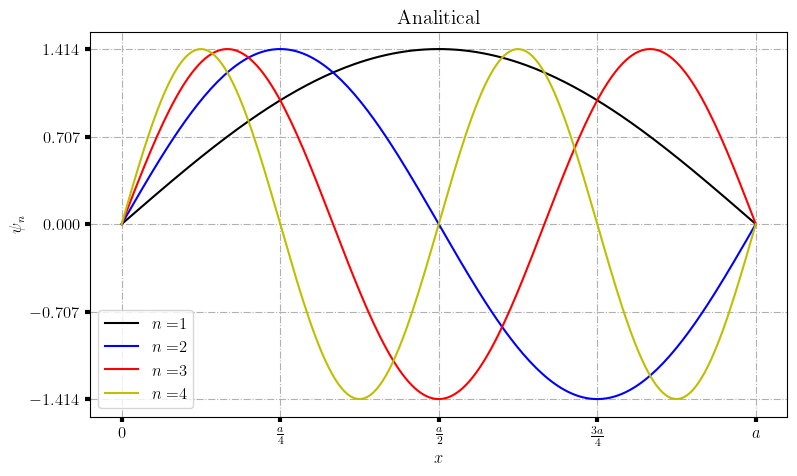

In [51]:

set_size_inches_x = 9.0
set_size_inches_y = 5.0
file_name = f'some_solutions_analitical_{1}_{the_ns[-1]}.pdf'

the_styles = ['-k','-b','-r','-y']

number_of_ticks_x = 4
number_of_ticks_y = 4

graph_x_label = r'$x$'
graph_y_label = r'$\psi_n$'

# =============================================================================================================================

fig, ax = plt.subplots()

for i_n,the_n in enumerate(the_ns):
    ax.plot(the_xs,the_ys[i_n], the_styles[i_n], label=r'$n=$'+str(the_n))
ax.legend(loc=3)

my_xticks = [r'$0$', r'$\frac{a}{4}$', r'$\frac{a}{2}$', r'$\frac{3a}{4}$', r'$a$']
my_xticks_values = [0.0,0.25*a,0.50*a,0.75*a,1.0*a]
ax.set_xticks(my_xticks_values)
ax.set_xticklabels(my_xticks)

max_x_values = np.max(the_xs)
min_x_values = np.min(the_xs)
xticks_delta = ( max_x_values - min_x_values ) / number_of_ticks_x
# ax.set_xticks(np.arange(min_x_values, max_x_values+xticks_delta, xticks_delta))

max_y_values = np.max(the_ys)
min_y_values = np.min(the_ys)
yticks_delta = ( max_y_values - min_y_values ) / number_of_ticks_y
ax.set_yticks(np.arange(min_y_values, max_y_values+yticks_delta, yticks_delta))

range_x_values = max_x_values - min_x_values
range_y_values = max_y_values - min_y_values

graph_title = 'Analitical'
ax.set_title(graph_title)
ax.set_xlabel(graph_x_label)
ax.set_ylabel(graph_y_label)

ax.set_xlim(min_x_values-(range_x_values/20.0), max_x_values+(range_x_values/20.0))
ax.set_ylim(min_y_values-(range_y_values/20.0), max_y_values+(range_y_values/20.0))

ax.grid(True, linestyle='-.')
ax.tick_params(labelcolor='k', labelsize='medium', width=3)

fig.set_size_inches(set_size_inches_x, set_size_inches_y)
fig.savefig(file_name,bbox_inches='tight', dpi = 100)

plt.show()


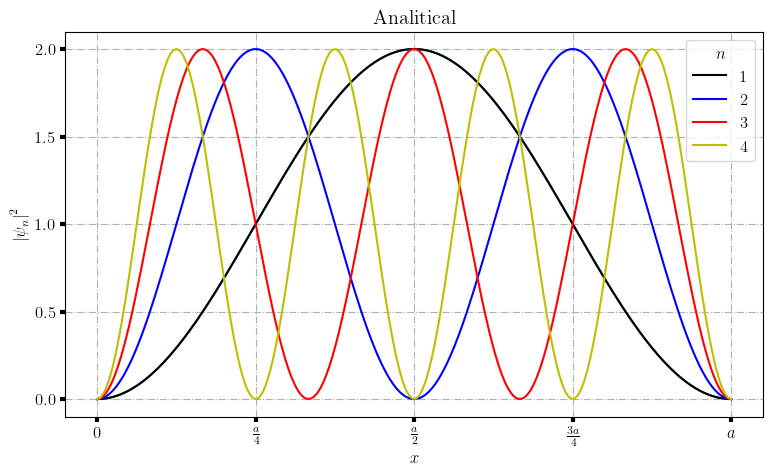

In [52]:

set_size_inches_x = 9.0
set_size_inches_y = 5.0
file_name = f'some_solutions_analitical_PsiSquared_{1}_{the_ns[-1]}.pdf'

the_styles = ['-k','-b','-r','-y']

number_of_ticks_x = 4
number_of_ticks_y = 4

graph_x_label = r'$x$'
graph_y_label = r'$\left| \psi_n \right|^2$'

# =============================================================================================================================

fig, ax = plt.subplots()

ax.plot(the_xs,the_ys_squared[0])

for i_n,the_n in enumerate(the_ns):
    ax.plot(the_xs,the_ys_squared[i_n], the_styles[i_n], label=str(the_n))
ax.legend(title=r'$n$',loc=1)

my_xticks = [r'$0$', r'$\frac{a}{4}$', r'$\frac{a}{2}$', r'$\frac{3a}{4}$', r'$a$']
my_xticks_values = [0.0,0.25*a,0.50*a,0.75*a,1.0*a]
ax.set_xticks(my_xticks_values)
ax.set_xticklabels(my_xticks)

max_x_values = np.max(the_xs)
min_x_values = np.min(the_xs)
xticks_delta = ( max_x_values - min_x_values ) / number_of_ticks_x
# ax.set_xticks(np.arange(min_x_values, max_x_values+xticks_delta, xticks_delta))

max_y_values = np.max(the_ys_squared)
min_y_values = np.min(the_ys_squared)
yticks_delta = ( max_y_values - min_y_values ) / number_of_ticks_y
ax.set_yticks(np.arange(min_y_values, max_y_values+yticks_delta, yticks_delta))

range_x_values = max_x_values - min_x_values
range_y_values = max_y_values - min_y_values

graph_title = 'Analitical'
ax.set_title(graph_title)
ax.set_xlabel(graph_x_label)
ax.set_ylabel(graph_y_label)

ax.set_xlim(min_x_values-(range_x_values/20.0), max_x_values+(range_x_values/20.0))
ax.set_ylim(min_y_values-(range_y_values/20.0), max_y_values+(range_y_values/20.0))

ax.grid(True, linestyle='-.')
ax.tick_params(labelcolor='k', labelsize='medium', width=3)

fig.set_size_inches(set_size_inches_x, set_size_inches_y)
fig.savefig(file_name,bbox_inches='tight', dpi = 100)

plt.show()


# Numerical Solution





## Approximation 1

For the numerical approximation of the second derivative we use:

\begin{equation*}
\frac{d^2 \psi}{d x^2}
=
\frac{
\psi \left( x_{i+1} \right)
- 2
\psi \left( x_{i} \right)
+
\psi \left( x_{i-1} \right)
}{\Delta x^2}
\end{equation*}

So that we have:

\begin{equation*}
\frac{
\psi \left( x_{i+1} \right)
- 2
\psi \left( x_{i} \right)
+
\psi \left( x_{i-1} \right)
}{\Delta x^2}
=
-
k_n
\psi \left( x_{i} \right)
\end{equation*}


### Obtaining the eigenfunctions/eigenvectors

Let's say we have $N+1$ points. We begin at $0$ and go until (including) $N$.

We have:

- $x_0 = 0$

- $x_N = a$

And:

- $\psi \left( x_0 \right) = 0$

- $\psi \left( x_N \right) = 0$

For $i=1$ until $i=N-1$ we have:

- For $i=1$:

\begin{equation*}
\frac{
\psi \left( x_{2} \right)
- 2
\psi \left( x_{1} \right)
+
\psi \left( x_{0} \right)
}{\Delta x^2}
=
-
k_n
\psi \left( x_{1} \right)
\end{equation*}

\begin{equation*}
\therefore
\frac{
\psi \left( x_{2} \right)
- 2
\psi \left( x_{1} \right)
}{\Delta x^2}
=
-
k_n
\psi \left( x_{1} \right)
\end{equation*}

- For $i=N-1$:

\begin{equation*}
\frac{
\psi \left( x_{N} \right)
- 2
\psi \left( x_{N-1} \right)
+
\psi \left( x_{N-2} \right)
}{\Delta x^2}
=
-
k_n
\psi \left( x_{N-1} \right)
\end{equation*}

\begin{equation*}
\therefore
\frac{
- 2
\psi \left( x_{N-1} \right)
+
\psi \left( x_{N-2} \right)
}{\Delta x^2}
=
-
k_n
\psi \left( x_{N-1} \right)
\end{equation*}

- For other cases $i$:

\begin{equation*}
\frac{
\psi \left( x_{i+1} \right)
- 2
\psi \left( x_{i} \right)
+
\psi \left( x_{i-1} \right)
}{\Delta x^2}
=
-
k_n
\psi \left( x_{i} \right)
\end{equation*}

In a way that we have:

\begin{equation*}
\frac{1}{\Delta x^2}
\boldsymbol{A}
\boldsymbol{\psi}
=
k_n
\boldsymbol{\psi}
\end{equation*}

Where:

\begin{equation*}
\boldsymbol{\psi}
=
\begin{bmatrix}
\psi_{1}\\
\psi_{2}\\
\vdots\\
\psi_{i-1}\\
\psi_{i}\\
\psi_{i+1}\\
\vdots\\
\psi_{N-2}\\
\psi_{N-1}
\end{bmatrix}
\end{equation*}

\begin{equation*}
\boldsymbol{A}
=
\begin{bmatrix}
2 & -1 & 0 \\
-1 & 2 & -1\\
 & & & & \ddots\\
 & & & & & & -1 & 2 & -1 & 0 & 0\\
 & & & & & & 0 & -1 & 2 & -1 & 0\\
 & & & & & & 0 & 0 & -1 & 2 & -1\\
 & & & & & & & & & & & & \ddots\\
 & & & & & & & & & & & & & & -1 & 2 & -1\\
 & & & & & & & & & & & & & & 0 & -1 & 2
\end{bmatrix}
\end{equation*}

In a way that we have an eigenvalue/eigenvector problem, where the eigenvectors are our eigenfunctions.

Obs.: we can just solve the eigenvalue/eigenvector problem without dividing by $\Delta x^2$ the matrix $\boldsymbol{A}$, this is the best thing to do, since it will make a better problem computationally. Also, we will normalize the eigenfunctions after anyway. The only thing to be aware is that we have $\Delta x$ the same between any $i$ and $i+1$ or $i$ and $i-1$.





In [11]:

def making_the_matrix_A_1(N=5,a=1.0):
    # the_delta_x = a/N
    the_delta_x = 1.0
    the_N = N-2
    the_sign = -1.0
    A = np.zeros((the_N,the_N))
    for i_0 in range(the_N):
        A[i_0,i_0] += -2.0*the_sign/np.power(the_delta_x,2.0)
        if((i_0!=0)and(i_0!=(the_N-1))):
            A[i_0,i_0-1] += 1.0*the_sign/np.power(the_delta_x,2.0)
            A[i_0,i_0+1] += 1.0*the_sign/np.power(the_delta_x,2.0)
        elif(i_0==0):
            A[i_0,i_0+1] += 1.0*the_sign/np.power(the_delta_x,2.0)
        elif(i_0==(the_N-1)):
            A[i_0,i_0-1] += 1.0*the_sign/np.power(the_delta_x,2.0)
    return A


In [12]:

# Testing

print(making_the_matrix_A_1(N=4))
print(making_the_matrix_A_1(N=5))
print(making_the_matrix_A_1(N=6))
print(making_the_matrix_A_1(N=7))


[[ 2. -1.]
 [-1.  2.]]
[[ 2. -1.  0.]
 [-1.  2. -1.]
 [ 0. -1.  2.]]
[[ 2. -1.  0.  0.]
 [-1.  2. -1.  0.]
 [ 0. -1.  2. -1.]
 [ 0.  0. -1.  2.]]
[[ 2. -1.  0.  0.  0.]
 [-1.  2. -1.  0.  0.]
 [ 0. -1.  2. -1.  0.]
 [ 0.  0. -1.  2. -1.]
 [ 0.  0.  0. -1.  2.]]


In [39]:

# the_N = 10
# the_N = 20
# the_N = 40
# the_N = 80
# the_N = 100
the_N = 200
# the_N = 1000

the_xs_num = np.linspace(x_initial,x_final,num=the_N)

the_eig = LA.eig(making_the_matrix_A_1(N=the_N))

the_eigva, the_eigve = LA.eig(making_the_matrix_A_1(N=the_N))

# print(f'the_eigva:\n{the_eigva}')
# print(f'the_eigve:\n{the_eigve}')

idx = np.argsort(the_eigva)
the_eigva = the_eigva[idx]
the_eigve = the_eigve[:,idx]

# print(f'the_eigva:\n{the_eigva}')
# print(f'the_eigve:\n{the_eigve}')

solution_N = 4
# solution_N = the_N-2
the_solutions = np.zeros((solution_N,the_N))
for i_1 in range(solution_N):
    # the_solutions[i_1,1:-1] = the_eigve[:,-(i_1+1)]
    the_solutions[i_1,1:-1] = the_eigve[:,i_1]

the_solutions_squared = np.power(the_solutions,2.0)


In [40]:
# the_eigva

In [41]:

# for i_1 in range(solution_N):
#     print()
#     print(50*'-')
#     print(f'i_1 = {i_1}')
#     # print(f'the_eig[0][i_1] = {the_eig[0][i_1]}')
#     plt.plot(the_solutions[i_1,:])
#     plt.title(f'k = {the_eigva[i_1]}')
#     plt.show()



Normailizing the eigenfunctions, we do this to make sure that:

\begin{equation*}
\int_{- \infty}^{+ \infty}{
\psi^* \left( x \right)
\psi \left( x \right)
} dx
=
1
\end{equation*}


In [42]:

# The normalization

for i_1 in range(solution_N):

    print()
    print(50*'-')
    print(f'i_1 = {i_1}')

    the_normalization_number = np.trapz(the_solutions_squared[i_1,:],the_xs_num)

    the_sign_number = np.trapz(the_solutions[i_1,:],the_xs_num)

    print(f'the_normalization_number = {the_normalization_number}')

    if(the_sign_number<0):
        the_solutions[i_1,:] = the_solutions[i_1,:]*(-1.0)

    the_solutions[i_1,:] = the_solutions[i_1,:]/np.sqrt(the_normalization_number)

    the_solutions_squared[i_1,:] = the_solutions_squared[i_1,:]/the_normalization_number
    
    the_normalization_number = np.trapz(the_solutions_squared[i_1,:],the_xs_num)

    print(f'the_normalization_number = {the_normalization_number}')

# the_solutions = np.sqrt(the_solutions_squared)


i_1 = 0
the_normalization_number = 0.005025125628140703
the_normalization_number = 1.0
i_1 = 1
the_normalization_number = 0.005025125628140705
the_normalization_number = 1.0
i_1 = 2
the_normalization_number = 0.0050251256281407045
the_normalization_number = 0.9999999999999999
i_1 = 3
the_normalization_number = 0.005025125628140703
the_normalization_number = 1.0


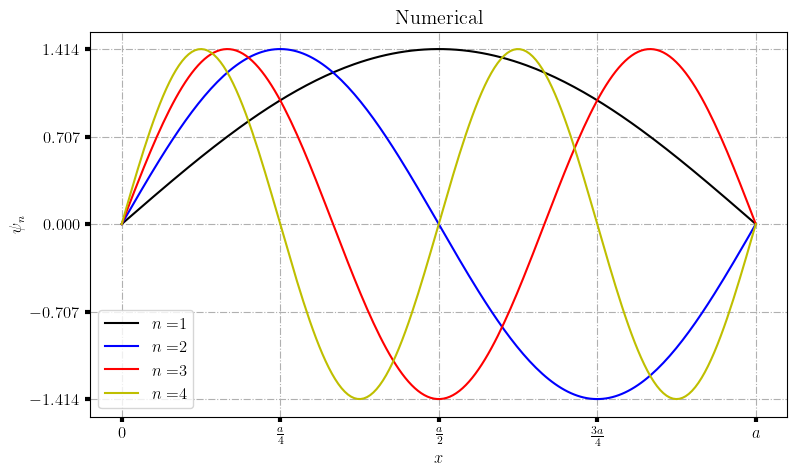

In [53]:

set_size_inches_x = 9.0
set_size_inches_y = 5.0
file_name = f'some_solutions_numerical_{1}_{4}.pdf'

the_styles = ['-k','-b','-r','-y']

number_of_ticks_x = 4
number_of_ticks_y = 4

graph_x_label = r'$x$'
graph_y_label = r'$\psi_n$'

# =============================================================================================================================

fig, ax = plt.subplots()

for i_n in range(4):
    ax.plot(the_xs_num,the_solutions[i_n,:], the_styles[i_n], label=r'$n=$'+str(i_n+1))
ax.legend(loc=3)

my_xticks = [r'$0$', r'$\frac{a}{4}$', r'$\frac{a}{2}$', r'$\frac{3a}{4}$', r'$a$']
my_xticks_values = [0.0,0.25*a,0.50*a,0.75*a,1.0*a]
ax.set_xticks(my_xticks_values)
ax.set_xticklabels(my_xticks)

max_x_values = np.max(the_xs_num)
min_x_values = np.min(the_xs_num)
xticks_delta = ( max_x_values - min_x_values ) / number_of_ticks_x
# ax.set_xticks(np.arange(min_x_values, max_x_values+xticks_delta, xticks_delta))

max_y_values = np.max(the_solutions)
min_y_values = np.min(the_solutions)
yticks_delta = ( max_y_values - min_y_values ) / number_of_ticks_y
ax.set_yticks(np.arange(min_y_values, max_y_values+yticks_delta, yticks_delta))

range_x_values = max_x_values - min_x_values
range_y_values = max_y_values - min_y_values

graph_title = 'Numerical'
ax.set_title(graph_title)
ax.set_xlabel(graph_x_label)
ax.set_ylabel(graph_y_label)

ax.set_xlim(min_x_values-(range_x_values/20.0), max_x_values+(range_x_values/20.0))
ax.set_ylim(min_y_values-(range_y_values/20.0), max_y_values+(range_y_values/20.0))

ax.grid(True, linestyle='-.')
ax.tick_params(labelcolor='k', labelsize='medium', width=3)

fig.set_size_inches(set_size_inches_x, set_size_inches_y)
fig.savefig(file_name,bbox_inches='tight', dpi = 100)

plt.show()


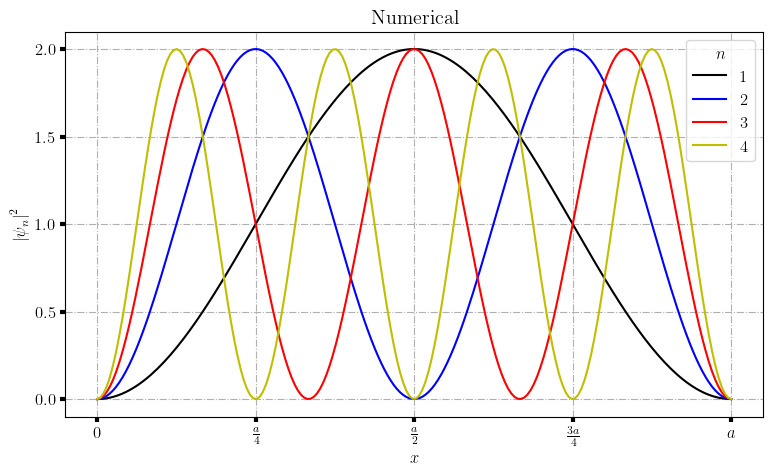

In [54]:

set_size_inches_x = 9.0
set_size_inches_y = 5.0
file_name = f'some_solutions_PsiSquared_numerical_{1}_{4}.pdf'

the_styles = ['-k','-b','-r','-y']

number_of_ticks_x = 4
number_of_ticks_y = 4

graph_x_label = r'$x$'
graph_y_label = r'$\left| \psi_n \right|^2$'

# =============================================================================================================================

fig, ax = plt.subplots()

for i_n in range(4):
    ax.plot(the_xs_num,the_solutions_squared[i_n,:], the_styles[i_n], label=str(i_n+1))
ax.legend(title=r'$n$',loc=1)

my_xticks = [r'$0$', r'$\frac{a}{4}$', r'$\frac{a}{2}$', r'$\frac{3a}{4}$', r'$a$']
my_xticks_values = [0.0,0.25*a,0.50*a,0.75*a,1.0*a]
ax.set_xticks(my_xticks_values)
ax.set_xticklabels(my_xticks)

max_x_values = np.max(the_xs_num)
min_x_values = np.min(the_xs_num)
xticks_delta = ( max_x_values - min_x_values ) / number_of_ticks_x
# ax.set_xticks(np.arange(min_x_values, max_x_values+xticks_delta, xticks_delta))

max_y_values = np.max(the_solutions_squared)
min_y_values = np.min(the_solutions_squared)
yticks_delta = ( max_y_values - min_y_values ) / number_of_ticks_y
ax.set_yticks(np.arange(min_y_values, max_y_values+yticks_delta, yticks_delta))

range_x_values = max_x_values - min_x_values
range_y_values = max_y_values - min_y_values

graph_title = 'Numerical'
ax.set_title(graph_title)
ax.set_xlabel(graph_x_label)
ax.set_ylabel(graph_y_label)

ax.set_xlim(min_x_values-(range_x_values/20.0), max_x_values+(range_x_values/20.0))
ax.set_ylim(min_y_values-(range_y_values/20.0), max_y_values+(range_y_values/20.0))

ax.grid(True, linestyle='-.')
ax.tick_params(labelcolor='k', labelsize='medium', width=3)

fig.set_size_inches(set_size_inches_x, set_size_inches_y)
fig.savefig(file_name,bbox_inches='tight', dpi = 100)

plt.show()


### Obtaining the eigenvalues

Remebering from quantum mechanics that the energy may be obtained through:

\begin{equation*}
E_n
=
\int_{- \infty}^{+ \infty}{
\psi^* \left( x \right)
\hat{H}
\psi \left( x \right)
} dx
\end{equation*}

Where $\hat{H}$ is the Hamiltonian operator, which, in this problem is given by:

\begin{equation*}
\hat{H}
=
-
\frac{\hbar^2}{2m}
\frac{d^2}{d x^2}
\end{equation*}

And, we have:

\begin{equation*}
E_n
=
-
\frac{\hbar^2}{2m}
\int_{- \infty}^{+ \infty}{
\psi^* \left( x \right)
\frac{d^2}{d x^2}
\psi \left( x \right)
} dx
\end{equation*}

We also have a relation between $k_n$ and $E_n$:

\begin{equation*}
E_n
=
\frac{\hbar^2 k_n^2}{2 m}
\end{equation*}

\begin{equation*}
\therefore
k_n
=
\sqrt{
\frac{2 m E_n}{\hbar^2}
}
\end{equation*}

So, we can find $k_n$ by doing the following operation:

\begin{equation*}
k_n
=
\sqrt{
-
\int_{- \infty}^{+ \infty}{
\psi^* \left( x \right)
\frac{d^2}{d x^2}
\psi \left( x \right)
} dx
}
\end{equation*}


In [46]:

the_kns = np.empty(solution_N)

for i_1 in range(solution_N):

    f_dev_1_numeric = np.gradient(the_solutions[i_1,:],the_xs_num)

    f_dev_2_numeric = np.gradient(f_dev_1_numeric,the_xs_num)

    # plt.plot(the_xs_num,the_solutions[i_1,:],'-k')
    # plt.plot(the_xs_num,f_dev_1_numeric,'-b')
    # plt.plot(the_xs_num,f_dev_2_numeric,'-r')
    # plt.show()

    E_n = - np.trapz(the_solutions[i_1,:]*f_dev_2_numeric,the_xs_num)
    
    the_kns[i_1] = np.sqrt(E_n)

print(f'the_kns\n{the_kns}')


the_kns
[ 3.14146216  6.2821414   9.421255   12.55802063]



## Approximation 2

For the numerical approximation of the second derivative we use:

**Try another aproximation for the second derivative!!!**


# References:

- Name of the book: Introduction to Quantum Mechanics
    - Author: David J. Griffiths
    - Edition: First edition
    - Publisher: Pearson College

- Name of the video: Sturm-Liouville Problem and its Numerical Solution
    - Link of the video: https://youtu.be/5kcophHPl_8?si=jg5yix14WR1y4kz4
    - Name of the channel: PDE beginner
    - Link of the channel: https://www.youtube.com/@pdebeginner3031



